In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# we will pass this value to every sklearn call so we ensure reproducibility
RANDOM_STATE = 55

# Understanding the problem

#### Datatset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context
- Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.  
- This dataset contains 11 features that can be used to predict possible heart disease.
- Let's train a machine learning model to assist with diagnosing this disease.

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
df = pd.read_csv("data/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


As we can see above, the variables:

- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

Are *categorical*, so we must one-hot encode them. 

As a reminder, one-hot encoding aims to transform a categorical variable with `n` outputs into `n` binary variables.

Pandas has a built-in method to one-hot encode variables, it is the function `pd.get_dummies`. There are several arguments to this function, but here we will use only a few. They are:

 - data: DataFrame to be used
 - prefix: A list with prefixes, so we know which value we are dealing with
 - columns: the list of columns that will be one-hot encoded. 'prefix' and 'columns' must have the same length.
 
For more information, you can always type `help(pd.get_dummies)` to read the function's full documentation.

In [4]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [5]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

In [6]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


Let's choose the variables that will be the input features of the model.
- The target is `HeartDisease`.
- All other variables are features that can potentially be used to predict the target, `HeartDisease`.

In [7]:
features = [x for x in df.columns if x not in 'HeartDisease']

We started with 11 features.  Let's see how many feature variables we have after one-hot encoding.

In [8]:
print(len(features))

20


# Splitting the Dataset

The `train_test_split()` function from Scikit-learn's model_selection module is used to partition the dataset into training and validation sets. The function divides both the features (X) and the labels (y) of the dataset.

The output of the function is stored into four variables: `X_train`, `X_val`, `y_train`, and `y_val`. X_train and y_train hold the feature data and corresponding labels for the training set, respectively. Similarly, X_val and y_val hold the feature data and corresponding labels for the validation set. The train_size parameter, set to 0.8, indicates that `80% of the data` should be allocated for training, leaving the remaining 20% for validation.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], 
                                                  train_size = 0.8, random_state = RANDOM_STATE)

In [10]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


# Plotting Metrics

`plot_metrics` is a generalized function that plots `train vs validation` metrics.

In [12]:
def plot_metrics(parameter_list, accuracy_list_train, accuracy_list_val, param_name):
    plt.title('Train x Validation metrics')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.xticks(ticks = range(len(parameter_list)),labels=parameter_list)
    plt.plot(accuracy_list_train)
    plt.plot(accuracy_list_val)
    plt.legend(['Train','Validation'])
    plt.show()

# Building the Model

We will construct our predictive model using three distinct methodologies: a Decision Tree, a Random Forest, and XGBoost. Each approach represents a different level of complexity and capability in handling diverse data patterns.

- A `Decision Tree` is a simple, yet powerful algorithm often used for interpretability.
- The `Random Forest` method, an ensemble of Decision Trees, offers increased accuracy by overcoming overfitting problems associated with a single Decision Tree. 
- `XGBoost`, short for eXtreme Gradient Boosting, is a highly sophisticated algorithm known for its speed and performance, which builds the model in a stage-wise fashion like other boosting methods but it generalizes them by allowing for the optimization of an arbitrary differentiable loss function.

`train_and_evaluate_model` is a generalized function that takes as input a `model` and training and validation datasets, and then trains the model on that dataset.

In [13]:
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train) # fit the model
    predictions_train = model.predict(X_train) # generate predictions for train set
    predictions_val = model.predict(X_val) # generate predictions for validation set

    # compute accuracy for train and validation sets
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)

    return accuracy_train, accuracy_val

## Decision Tree

The hyperparameters we will use here are:
 - `min_samples_split`: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - `max_depth`: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [11]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

In [14]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=RANDOM_STATE)
    accuracy_train, accuracy_val = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

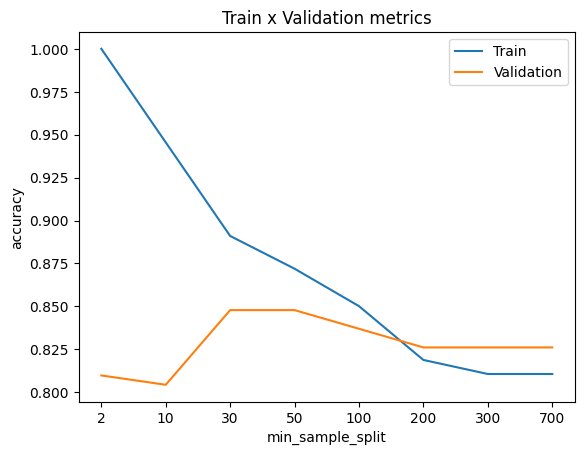

In [15]:
plot_metrics(min_samples_split_list, accuracy_list_train, accuracy_list_val, 'min_sample_split')